Data Preparing

    Analyze Data
    Descriptive statistics
    Data Visualization


In [1]:
import warnings
warnings.simplefilter('ignore')

import json
import numpy as np
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt

Load Dataset

In [2]:
data = pd.read_csv('./tempus_data/targets.csv', parse_dates=['patient_id','biomarker_id','target_label'])
data.head()


,patient_id,biomarker_id,target_label
0,1002df1d3,89c43bb4,0
1,1010441f,3ae31327,0
2,101eb6af1,1d8f7bab9,0
3,10204394e,129ee8c6c,0
4,1021d329b,1b44145bd,0


In [3]:
data.shape

(1734, 3)

In [4]:
bio = pd.read_csv('./tempus_data/biomarkers.csv')
bio.head()

,biomarker_id,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,100505de2,1,1,1,0,0,0,1,0,0,...,1,0,1,1,0,0,1,1.0,1,1
1,10075c5c2,1,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,NaN,1,1
2,10105cb22,1,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,NaN,1,1
3,101219d6e,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1.0,1,1
4,10135ad45,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,0,1,1.0,1,1


In [5]:
bio.shape

(1960, 15158)

Add Biomarkers to Patient Data

In [6]:
data = pd.merge(data, bio, on='biomarker_id')
data.head()

,patient_id,biomarker_id,target_label,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,1002df1d3,89c43bb4,0,1,1,1,1,0,0,0,...,1,0,0,1,1,0,1,1.0,1,1
1,1010441f,3ae31327,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,1,1.0,1,1
2,101eb6af1,1d8f7bab9,0,1,1,1,1,0,0,0,...,1,0,1,0,0,0,1,NaN,1,1
3,10204394e,129ee8c6c,0,1,1,1,1,0,0,0,...,0,0,1,0,0,1,1,1.0,1,1
4,1021d329b,1b44145bd,0,1,1,1,1,0,0,0,...,1,0,0,0,0,1,1,1.0,1,1


In [7]:
data.shape

(1734, 15160)

In [9]:
def parse_json(data):
    """ function to parse json data """
    patient_id = []
    institution = []
    cohort_id = []
    gender = []
    age = []
    race = []
    disease_sub_type = []
    comorbidity_index = []
    cohort_qualifier = []
    smoking_status = []
    months_since_diagnosis = []
    bmi_level = []
    exercise_frequency = []
    alcohol_usage = []
    # parse each item
    for item in data:
        for i in range(len(item['patient_profiles'])):
            
            if 'age' not in item['patient_profiles'][i]['demographics']:
                age.append(np.NaN) 
            if 'race' not in item['patient_profiles'][i]['demographics']:
                race.append(np.NaN)
            if 'smoking_status' not in item['patient_profiles'][i]['status']:
                smoking_status.append(np.NaN)
            if 'months_since_diagnosis' not in item['patient_profiles'][i]['status']:
                months_since_diagnosis.append(np.NaN)
            if 'bmi_level' not in item['patient_profiles'][i]['status']:
                bmi_level.append(np.NaN)
            if 'exercise_frequency' not in item['patient_profiles'][i]['status']:
                exercise_frequency.append(np.NaN)
            if 'alcohol_usage' not in item['patient_profiles'][i]['status']:
                alcohol_usage.append(np.NaN)
                
            if 'age' in item['patient_profiles'][i]['demographics'] :
                age.append(item['patient_profiles'][i]['demographics']['age'])
            if 'race' in item['patient_profiles'][i]['demographics']:
                race.append(item['patient_profiles'][i]['demographics']['race'])
            if 'smoking_status' in item['patient_profiles'][i]['status']:
                smoking_status.append(item['patient_profiles'][i]['status']['smoking_status'])
            if 'months_since_diagnosis' in item['patient_profiles'][i]['status']:
                months_since_diagnosis.append(item['patient_profiles'][i]['status']['months_since_diagnosis'])
            
            if 'bmi_level' in item['patient_profiles'][i]['status']:
                bmi_level.append(item['patient_profiles'][i]['status']['bmi_level'])
            
            
            if 'exercise_frequency' in item['patient_profiles'][i]['status']:
                exercise_frequency.append(item['patient_profiles'][i]['status']['exercise_frequency'])
            
            if 'alcohol_usage' in item['patient_profiles'][i]['status']:
                alcohol_usage.append(item['patient_profiles'][i]['status']['alcohol_usage'])
                
            patient_id.append(item['patient_profiles'][i]['patient_id'])
            institution.append(item['institution'])
            cohort_id.append(item['cohort_id'])
            gender.append(item['patient_profiles'][i]['demographics']['gender'])


            disease_sub_type.append(item['patient_profiles'][i]['status']['disease_sub_type'])
            comorbidity_index.append(item['patient_profiles'][i]['status']['comorbidity_index'])
            cohort_qualifier.append(item['patient_profiles'][i]['status']['cohort_qualifier'])
            

        
    
    # create DataFrame
    maps = {'patient_id': patient_id, 'institution': institution, 'cohort_id': cohort_id, 'gender': gender, 'age': age, 'race': race,'disease_sub_type':disease_sub_type,'comorbidity_index':comorbidity_index,'cohort_qualifier':cohort_qualifier, 'smoking_status':smoking_status,'months_since_diagnosis':months_since_diagnosis,'alcohol_usage':alcohol_usage,'exercise_frequency':exercise_frequency,'bmi_level':bmi_level} 
    columns=['patient_id','institution', 'cohort_id', 'gender', 'age', 'race','disease_sub_type','comorbidity_index','cohort_qualifier','smoking_status','months_since_diagnosis','alcohol_usage','exercise_frequency','bmi_level']
    
    return pd.DataFrame(maps, columns=columns)

In [10]:
import json
with open('./tempus_data/patient_profiles.json', 'r') as f:
    json_data = json.load(f)

patient_profiles = parse_json(json_data)
patient_profiles.head()


,patient_id,institution,cohort_id,gender,age,race,disease_sub_type,comorbidity_index,cohort_qualifier,smoking_status,months_since_diagnosis,alcohol_usage,exercise_frequency,bmi_level
0,102bb8fae,Saint Penelope Medical Center,14562556998,Female,68.0,NaN,A,0.0,True,never,1.0,NaN,NaN,NaN
1,10e32947f,Saint Penelope Medical Center,14562556998,Female,66.0,White,A,NaN,True,former,0.0,NaN,NaN,NaN
2,11156e14a,Saint Penelope Medical Center,14562556998,Male,61.0,White,A,1.0,True,never,16.0,NaN,NaN,NaN
3,113d8066d,Saint Penelope Medical Center,14562556998,Male,62.0,NaN,B,NaN,True,current,0.0,NaN,NaN,NaN
4,113ec3f1,Saint Penelope Medical Center,14562556998,Male,59.0,NaN,A,NaN,True,former,9.0,NaN,NaN,NaN


In [11]:
patient_profiles.shape

(2351, 14)

In [12]:
data = pd.merge(patient_profiles,data,  on='patient_id')
data.head()

,patient_id,institution,cohort_id,gender,age,race,disease_sub_type,comorbidity_index,cohort_qualifier,smoking_status,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,11156e14a,Saint Penelope Medical Center,14562556998,Male,61.0,White,A,1.0,True,never,...,1,0,0,0,0,0,1,1.0,1,1
1,113d8066d,Saint Penelope Medical Center,14562556998,Male,62.0,NaN,B,NaN,True,current,...,1,0,1,0,0,0,1,1.0,1,1
2,113ec3f1,Saint Penelope Medical Center,14562556998,Male,59.0,NaN,A,NaN,True,former,...,1,0,1,1,1,0,1,1.0,1,1
3,114a37875,Saint Penelope Medical Center,14562556998,Male,68.0,NaN,B,NaN,True,never,...,1,0,1,0,1,0,1,1.0,1,1
4,11b1d32a1,Saint Penelope Medical Center,14562556998,Male,47.0,White,A,NaN,True,never,...,1,0,0,0,0,0,1,1.0,1,1


In [13]:
data.shape

(1734, 15173)

Analyze Data:
Descriptive Statitics

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cohort_id,1734.0,1.456256e+10,0.000000,1.456256e+10,1.456256e+10,1.456256e+10,1.456256e+10,1.456256e+10
age,1611.0,5.979081e+01,9.516331,2.500000e+01,5.400000e+01,6.100000e+01,6.700000e+01,8.300000e+01
comorbidity_index,353.0,7.167139e-01,0.786374,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
months_since_diagnosis,1611.0,6.800124e+00,10.842854,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01,9.300000e+01
exercise_frequency,330.0,2.757576e-01,0.561982,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
...,...,...,...,...,...,...,...,...
BM15152,1734.0,2.231834e-01,0.416500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
BM15153,1734.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
BM15154,1038.0,9.826590e-01,0.130602,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
BM15155,1734.0,9.146482e-01,0.279485,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#checking Null Valriables

In [15]:
# Null information
data.isnull().sum().sort_values()

patient_id               0
BM10081                  0
BM10082                  0
BM10083                  0
BM10084                  0
                      ... 
BM12793                696
comorbidity_index     1381
alcohol_usage         1404
exercise_frequency    1404
bmi_level             1506
Length: 15173, dtype: int64

In [287]:
print (data.shape)

(1734, 15173)


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1733
Columns: 15173 entries, patient_id to BM15156
dtypes: bool(1), float64(50), int64(15112), object(10)
memory usage: 200.7+ MB


In [15]:
# check missing values
missing = data.isnull().sum()
missing[missing > 0]

age                        123
race                       458
comorbidity_index         1381
smoking_status             123
months_since_diagnosis     123
alcohol_usage             1404
exercise_frequency        1404
bmi_level                 1506
BM01069                    696
BM01254                    696
BM01671                    696
BM02181                    696
BM02498                    696
BM03527                    696
BM05569                    696
BM05796                    696
BM05946                    696
BM05948                    696
BM05998                    696
BM06148                    696
BM06675                    696
BM06893                    696
BM07163                    696
BM07181                    696
BM08310                    696
BM08420                    696
BM08498                    696
BM08803                    696
BM08828                    696
BM09067                    696
BM09176                    696
BM09302                    696
BM09912 

In [290]:
data['target_label'].describe()

count     1734
unique       2
top          0
freq      1353
Name: target_label, dtype: object

In [16]:
#Normalizing dataframe

data['gender']= data['gender'].str.lower()
data['smoking_status']= data['smoking_status'].str.lower()
data['race']= data['race'].str.lower()

In [18]:
#droping useless column
# cohort_qualifier,cohort_id,biomarker_id,patient_id
data = data.drop(labels=['cohort_qualifier', 'cohort_id', 'biomarker_id','patient_id'], axis=1, inplace=False)

In [17]:
# Removing column with lots of missing data point

# I used rule of thumb around 30% 

data = data.drop(labels=['BM06893','BM06675','BM06148','BM05998','BM05948','BM05946','BM05796','BM14430','BM14622','BM15091','BM15154','BM12379', 'BM12596','BM12793','BM13623','BM13691','BM13725','BM14027','BM11523','BM11929','BM12011','BM12018','BM12119','BM12159','BM12352','BM09067','BM09176','BM09302','BM09912','BM09932','BM10396','BM11007','BM07163','BM07181','BM08310','BM08420','BM08498','BM08803','BM08828','BM03527','BM05569','BM02498','BM02181','BM01671','BM01254','BM01069','comorbidity_index', 'exercise_frequency', 'bmi_level','alcohol_usage'], axis=1, inplace=False)
# data.head()

In [19]:
# Dropping columns with variance 0, contains only 1 value... add no value to the model

#VARAINCE 0
#Remove Columns That Contain a Single Value
# get number of unique values for each column
print(data.shape)
# get number of unique values for each column
counts = data.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
# data.drop(to_del, axis=1, inplace=True)

data.drop(data.columns[to_del],axis=1,inplace=True)
print (data.shape)

(1734, 15119)
[51, 166, 200, 222, 257, 274, 389, 411, 414, 514, 582, 615, 659, 661, 666, 766, 806, 817, 881, 915, 928, 1072, 1081, 1146, 1160, 1178, 1202, 1274, 1362, 1488, 1514, 1515, 1588, 1632, 1659, 1727, 1765, 1841, 1849, 1892, 2037, 2111, 2233, 2248, 2249, 2386, 2402, 2418, 2533, 2568, 2623, 2635, 2684, 2732, 2754, 2832, 3040, 3056, 3086, 3200, 3221, 3343, 3408, 3464, 3502, 3520, 3561, 3596, 3617, 3758, 3821, 3859, 3874, 3981, 3994, 4046, 4052, 4151, 4376, 4454, 4464, 4503, 4515, 4576, 4593, 4627, 4689, 4717, 4841, 4869, 4872, 4886, 4940, 4944, 4987, 5012, 5058, 5159, 5195, 5267, 5275, 5311, 5313, 5332, 5355, 5360, 5413, 5459, 5488, 5513, 5516, 5545, 5859, 5894, 5936, 5959, 5992, 6015, 6028, 6076, 6115, 6229, 6319, 6338, 6352, 6376, 6387, 6415, 6446, 6497, 6573, 6598, 6661, 6713, 6790, 6815, 6826, 6860, 6926, 6941, 6963, 7072, 7119, 7208, 7345, 7368, 7384, 7476, 7503, 7509, 7534, 7591, 7598, 7636, 7745, 7748, 7910, 7988, 8024, 8071, 8181, 8220, 8264, 8272, 8286, 8288, 8304, 8330,

In [21]:
data.shape

(1734, 14794)

In [475]:
# split data into inputs and outputs
train = data
Y = train['target_label']
# Drop the label feature
X = train.drop("target_label",axis=1)

print(X.shape, Y.shape)


(1734, 14799) (1734,)


In [410]:
#preparing data for imputation, For numerical data I used median, for categoriacal data I used mode... 
#there are number of ways that we can use for data imputation
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [411]:
print (categorical_ix)

Index(['institution', 'gender', 'race', 'disease_sub_type', 'smoking_status'], dtype='object')


In [412]:
print (numerical_ix)

Index(['age', 'months_since_diagnosis', 'BM00000', 'BM00001', 'BM00002',
       'BM00003', 'BM00004', 'BM00005', 'BM00006', 'BM00007',
       ...
       'BM15145', 'BM15146', 'BM15147', 'BM15148', 'BM15149', 'BM15150',
       'BM15151', 'BM15152', 'BM15155', 'BM15156'],
      dtype='object', length=14794)


In [ ]:
data.to_csv("/Users/yazdavar/code/interview/coding_interview/tempus_data/data_merge.csv", sep='\t')

In [33]:
data_categorical = data.select_dtypes(include=['object', 'bool'])
data_categorical.head

<bound method NDFrame.head of                         institution  gender                       race  \
0     Saint Penelope Medical Center    male                      white   
1     Saint Penelope Medical Center    male                        NaN   
2     Saint Penelope Medical Center    male                        NaN   
3     Saint Penelope Medical Center    male                        NaN   
4     Saint Penelope Medical Center    male                      white   
...                             ...     ...                        ...   
1729      Johnson & Bloom Hospitals    male  black or african american   
1730      Johnson & Bloom Hospitals  female                      white   
1731      Johnson & Bloom Hospitals    male                        NaN   
1732      Johnson & Bloom Hospitals  female  black or african american   
1733      Johnson & Bloom Hospitals  female  black or african american   

     disease_sub_type smoking_status target_label  
0                   A        

In [34]:
#getting mode for categorical data and fill the Nans
data_categorical = data_categorical.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [35]:
# Null information
data_categorical.isnull().sum().sort_values()

institution         0
gender              0
race                0
disease_sub_type    0
smoking_status      0
target_label        0
dtype: int64

In [36]:
Y = data_categorical['target_label']
# Drop the label feature
data_categorical = data_categorical.drop("target_label",axis=1)

In [37]:
#Dummyfying categorical data using one hot encoding

data_categorical_dummies = pd.get_dummies(data_categorical, columns = ['institution', 'gender', 'race', 'disease_sub_type', 'smoking_status'], drop_first = True)
data_categorical_dummies

,institution_Goodfellow Research Institute,institution_Johnson & Bloom Hospitals,institution_Montague Hospital,institution_Saint Penelope Medical Center,institution_University Hospital System,gender_male,race_asian,race_black or african american,race_native hawaiian or other pacific islander,race_white,disease_sub_type_B,disease_sub_type_C,disease_sub_type_D,disease_sub_type_E,disease_sub_type_F,smoking_status_former,smoking_status_never,smoking_status_unknown
0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1730,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1731,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
1732,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [38]:
#selecting only numerical values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_numeric = data.select_dtypes(include=numerics)

In [39]:

data_numeric.fillna(data_numeric.median(), inplace=True)

In [84]:
data_categorical_dummies.shape

(1734, 18)

In [85]:
data_numeric.shape

(1734, 14794)

In [40]:
# create a new dataframe that has categorical features encoded, and both numerical Nan and categorical Nans treated
df_fill_na = pd.concat([data_categorical_dummies,data_numeric], axis=1)
df_fill_na = pd.concat([df_fill_na,data['target_label']],axis = 1)

In [41]:
df_fill_na.shape

(1734, 14807)

In [62]:

data.to_csv("/Users/yazdavar/code/interview/coding_interview/tempus_data/df_fill_na.csv", sep='\t')

In [ ]:
#Feature Selection with Variance

# Class Imbalance problem

        Count Percentage
Cases     381      21.97
Contorl  1353      78.03


I highlight that because of class imbalance problem accuracy would not be right metric for model comparison.
I am measuring F1 score... which is harmoninc mean of precision and recall 

In [ ]:
#saving the data distribution
#we Have to prepare the data for resamling .... But before resampling I am creating the test dataset 
#contains 30% of the data points that randomly selected

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import accuracy_score

# Before changing the data distribution I am saving the test set


# split data train 70 % and test 30 %
x_train, X_TEST, y_train, Y_TEST = train_test_split(X, Y, test_size=0.3, random_state=42)

In [47]:
train_data = pd.concat([x_train,y_train], axis=1)
train_data

,institution_Goodfellow Research Institute,institution_Johnson & Bloom Hospitals,institution_Montague Hospital,institution_Saint Penelope Medical Center,institution_University Hospital System,gender_male,race_asian,race_black or african american,race_native hawaiian or other pacific islander,race_white,...,BM15146,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15155,BM15156,target_label
1181,0,0,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,0,1,1,1
720,0,0,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,1,1,0
787,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,1,1,1
614,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
845,0,0,0,0,0,1,1,0,0,0,...,1,1,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,0,0,1,1,0,0,0,1,...,1,1,0,1,0,0,0,0,0,0
1294,1,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,0,1,1,1
860,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
1459,0,0,1,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,1,1,1


Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 

We have several approaches to conduct resampling:

1)Removing samples from the majority class (under-sampling) 
2)Adding more examples from the minority class (over-sampling) 
3)Generating Syntetic data with SMOTE


We do not have a huge dataset of instances thats why probably upsaling works better than the 2 others....
I have tried all 3 and based on the results I decided to choose upsampling

In [48]:
# Display new class counts
train_data.target_label.value_counts()

0    950
1    263
Name: target_label, dtype: int64

In [49]:
# 1. Up-sample Minority Class
# There are several heuristics for doing so, but the most common way is to simply resample with replacement.
 	
from sklearn.utils import resample

# Separate majority and minority classes
train_data_majority = train_data[train_data['target_label']=='0']

train_data_minority = train_data[train_data['target_label'] =='1']

# df_minority
# Upsample minority class
train_data_minority_upsampled = resample(train_data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=950,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_data_upsampled = pd.concat([train_data_majority, train_data_minority_upsampled])
 
# Display new class counts
train_data_upsampled.target_label.value_counts()

1    950
0    950
Name: target_label, dtype: int64

In [610]:
#down sampling
from sklearn.utils import resample

 
# Downsample majority class
train_data_majority_downsampled = resample(train_data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=263,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
train_data_downsampled = pd.concat([train_data_minority, train_data_majority_downsampled])
 
# Display new class counts
train_data_downsampled.target_label.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

1    263
0    263
Name: target_label, dtype: int64

In [ ]:
train_data_downsampled_saved = train_data_downsampled

In [611]:
# split data into inputs and outputs
# data = data.values
# X = data[:, :-1]
# y = data[:, -1]

Y_downsampled = train_data_downsampled['target_label']
# Drop the label feature
X_downsampled = train_data_downsampled.drop("target_label",axis=1)

print(X_downsampled.shape, Y_downsampled.shape)

(526, 14812) (526,)


In [612]:
x_train = X_downsampled
y_train = Y_downsampled

In [53]:
Y_upsampled = train_data_upsampled['target_label']
# Drop the label feature
X_upsampled = train_data_upsampled.drop("target_label",axis=1)

print(X_upsampled.shape, Y_upsampled.shape)

(1900, 14806) (1900,)


In [54]:
train_data_upsampled_saved = train_data_upsampled

In [239]:
train_data_upsampled_saved.to_csv("/Users/yazdavar/code/interview/coding_interview/tempus_data/train_data_upsampled_saved.csv", sep='\t')

In [56]:
x_train = X_upsampled
y_train = Y_upsampled

In [623]:
#Smote prep

Y_Trained = train_data['target_label']
# Drop the label feature
X_Trianed = train_data.drop("target_label",axis=1)

print(X_Trianed.shape, Y_Trained.shape)

(1213, 14812) (1213,)


In [628]:
#Smote
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_Trianed, Y_Trained)

# plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
X_sm.shape

(1900, 14812)

We have lots of features and small number of instance... Before fitting any model:
We have to decrease the model dimension


>Threshold=0.00, Features=14806
>Threshold=0.05, Features=13147
>Threshold=0.10, Features=11366
>Threshold=0.15, Features=9361
>Threshold=0.20, Features=6630
>Threshold=0.25, Features=2
>Threshold=0.30, Features=2
>Threshold=0.35, Features=2
>Threshold=0.40, Features=2
>Threshold=0.45, Features=2
>Threshold=0.50, Features=2


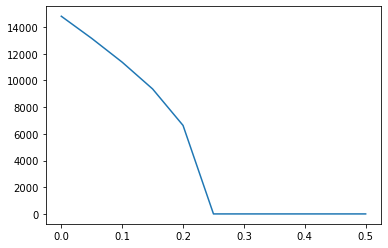

In [57]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
	# define the transform
	transform = VarianceThreshold(threshold=t)
	# transform the input data
	X_sel = transform.fit_transform(X)
	# determine the number of input features
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (t, n_features))
	# store the result
	results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

In [ ]:
#Insights: Based on the variance analysis lots of the features do not add any predcite value to the final model

There are many approaches for reducing the dimension...

Univariate Feature Selection:

The simplest and fastest methods are based on univariate statistical tests. For each feature, measure how strongly the target depends on the feature using a statistical test like 𝜒2.

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 15 features
select_feature = SelectKBest(chi2, k=15).fit(x_train, y_train)

In [59]:
print('Score list:', select_feature.scores_)
mask = select_feature.get_support() #list of booleans
new_features = [] # The list of your K best features

for bol, feature in zip(mask, x_train.columns):
    if bol:
        new_features.append(feature)
print (new_features)

Score list: [7.50649351e+00 6.00000000e-01 2.36842105e+00 ... 9.47867299e-01
 1.44592250e-02 2.17864924e-03]
['gender_male', 'age', 'months_since_diagnosis', 'BM01029', 'BM04394', 'BM05166', 'BM05719', 'BM05997', 'BM08470', 'BM10516', 'BM11831', 'BM12553', 'BM12577', 'BM14353', 'BM14764']


Accuracy is:  0.8829174664107485
f1_score is:  0.7336244541484717


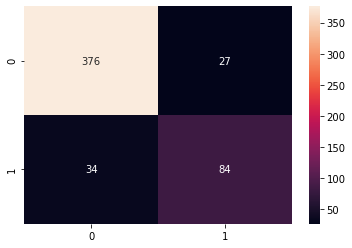

In [61]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(X_TEST)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(Y_TEST,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
f1_scr= f1_score(Y_TEST,clf_rf_2.predict(x_test_2),pos_label='1')
print('f1_score is: ',f1_scr)
cm_2 = confusion_matrix(Y_TEST,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Insight the baseline model achive around 74% F1 score on test dataset after reducing the dimension with only chi^2.

I am also showing Confusion matrix to check the distribution of errors.

Feature selection with recursive feature Elimination.

Recursive feature elimiantion which consider the correlation of fetures while fitting the models.

This has its own pros and cons.. and the main cons would be it is time consuming. 

In [63]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=30, step=1)
rfe = rfe.fit(x_train, y_train)

In [65]:
print('Chosen best 30 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 30 feature by rfe: Index(['age', 'months_since_diagnosis', 'BM01295', 'BM01775', 'BM01795',
       'BM02320', 'BM03875', 'BM03881', 'BM04160', 'BM07903', 'BM08449',
       'BM08470', 'BM08512', 'BM08601', 'BM09124', 'BM09160', 'BM09207',
       'BM10145', 'BM10171', 'BM10306', 'BM10516', 'BM10582', 'BM11075',
       'BM11148', 'BM11756', 'BM11831', 'BM12241', 'BM12553', 'BM12667',
       'BM13234'],
      dtype='object')


Accuracy is:  0.8809980806142035
f1_score is:  0.6990291262135923


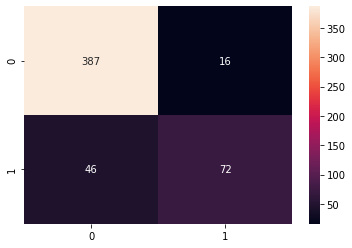

In [67]:
#random forest classifier with n_estimators=10 (default)
ac_3 = accuracy_score(Y_TEST,rfe.predict(X_TEST))
print('Accuracy is: ', ac_3)
f1_scr= f1_score(Y_TEST,rfe.predict(X_TEST),pos_label='1')
print('f1_score is: ',f1_scr)
cm_3 = confusion_matrix(Y_TEST,rfe.predict(X_TEST))
sns.heatmap(cm_3,annot=True,fmt="d")

In [ ]:
 
g = sns.pairplot(d, hue="target_label", palette="husl")
#Insight We have outlier in the data

In [ ]:
#Insights : fitting a baseline model for and get the resukt of 70% F1 on test set by using only 30 features with
#Random Forrest

In [ ]:
#Ranking the fesaturres while visaulizing their importance

In [655]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 10298 (0.017882)
2. feature 11585 (0.006792)
3. feature 19 (0.004055)
4. feature 8309 (0.003069)
5. feature 18 (0.002502)
6. feature 8350 (0.000923)
7. feature 8431 (0.000910)
8. feature 2621 (0.000890)
9. feature 14045 (0.000825)
10. feature 11513 (0.000797)
11. feature 2727 (0.000793)
12. feature 5588 (0.000705)
13. feature 13467 (0.000704)
14. feature 12801 (0.000671)
15. feature 6158 (0.000658)
16. feature 5 (0.000658)
17. feature 2257 (0.000646)
18. feature 663 (0.000639)
19. feature 3235 (0.000635)
20. feature 5620 (0.000626)
21. feature 12908 (0.000617)
22. feature 3646 (0.000583)
23. feature 5082 (0.000566)
24. feature 9457 (0.000560)
25. feature 5824 (0.000558)
26. feature 9939 (0.000555)
27. feature 13451 (0.000550)
28. feature 14276 (0.000546)
29. feature 13587 (0.000536)
30. feature 8288 (0.000534)
31. feature 13983 (0.000527)
32. feature 9010 (0.000519)
33. feature 12286 (0.000515)
34. feature 7046 (0.000515)
35. feature 3935 (0.000514)
36. feat

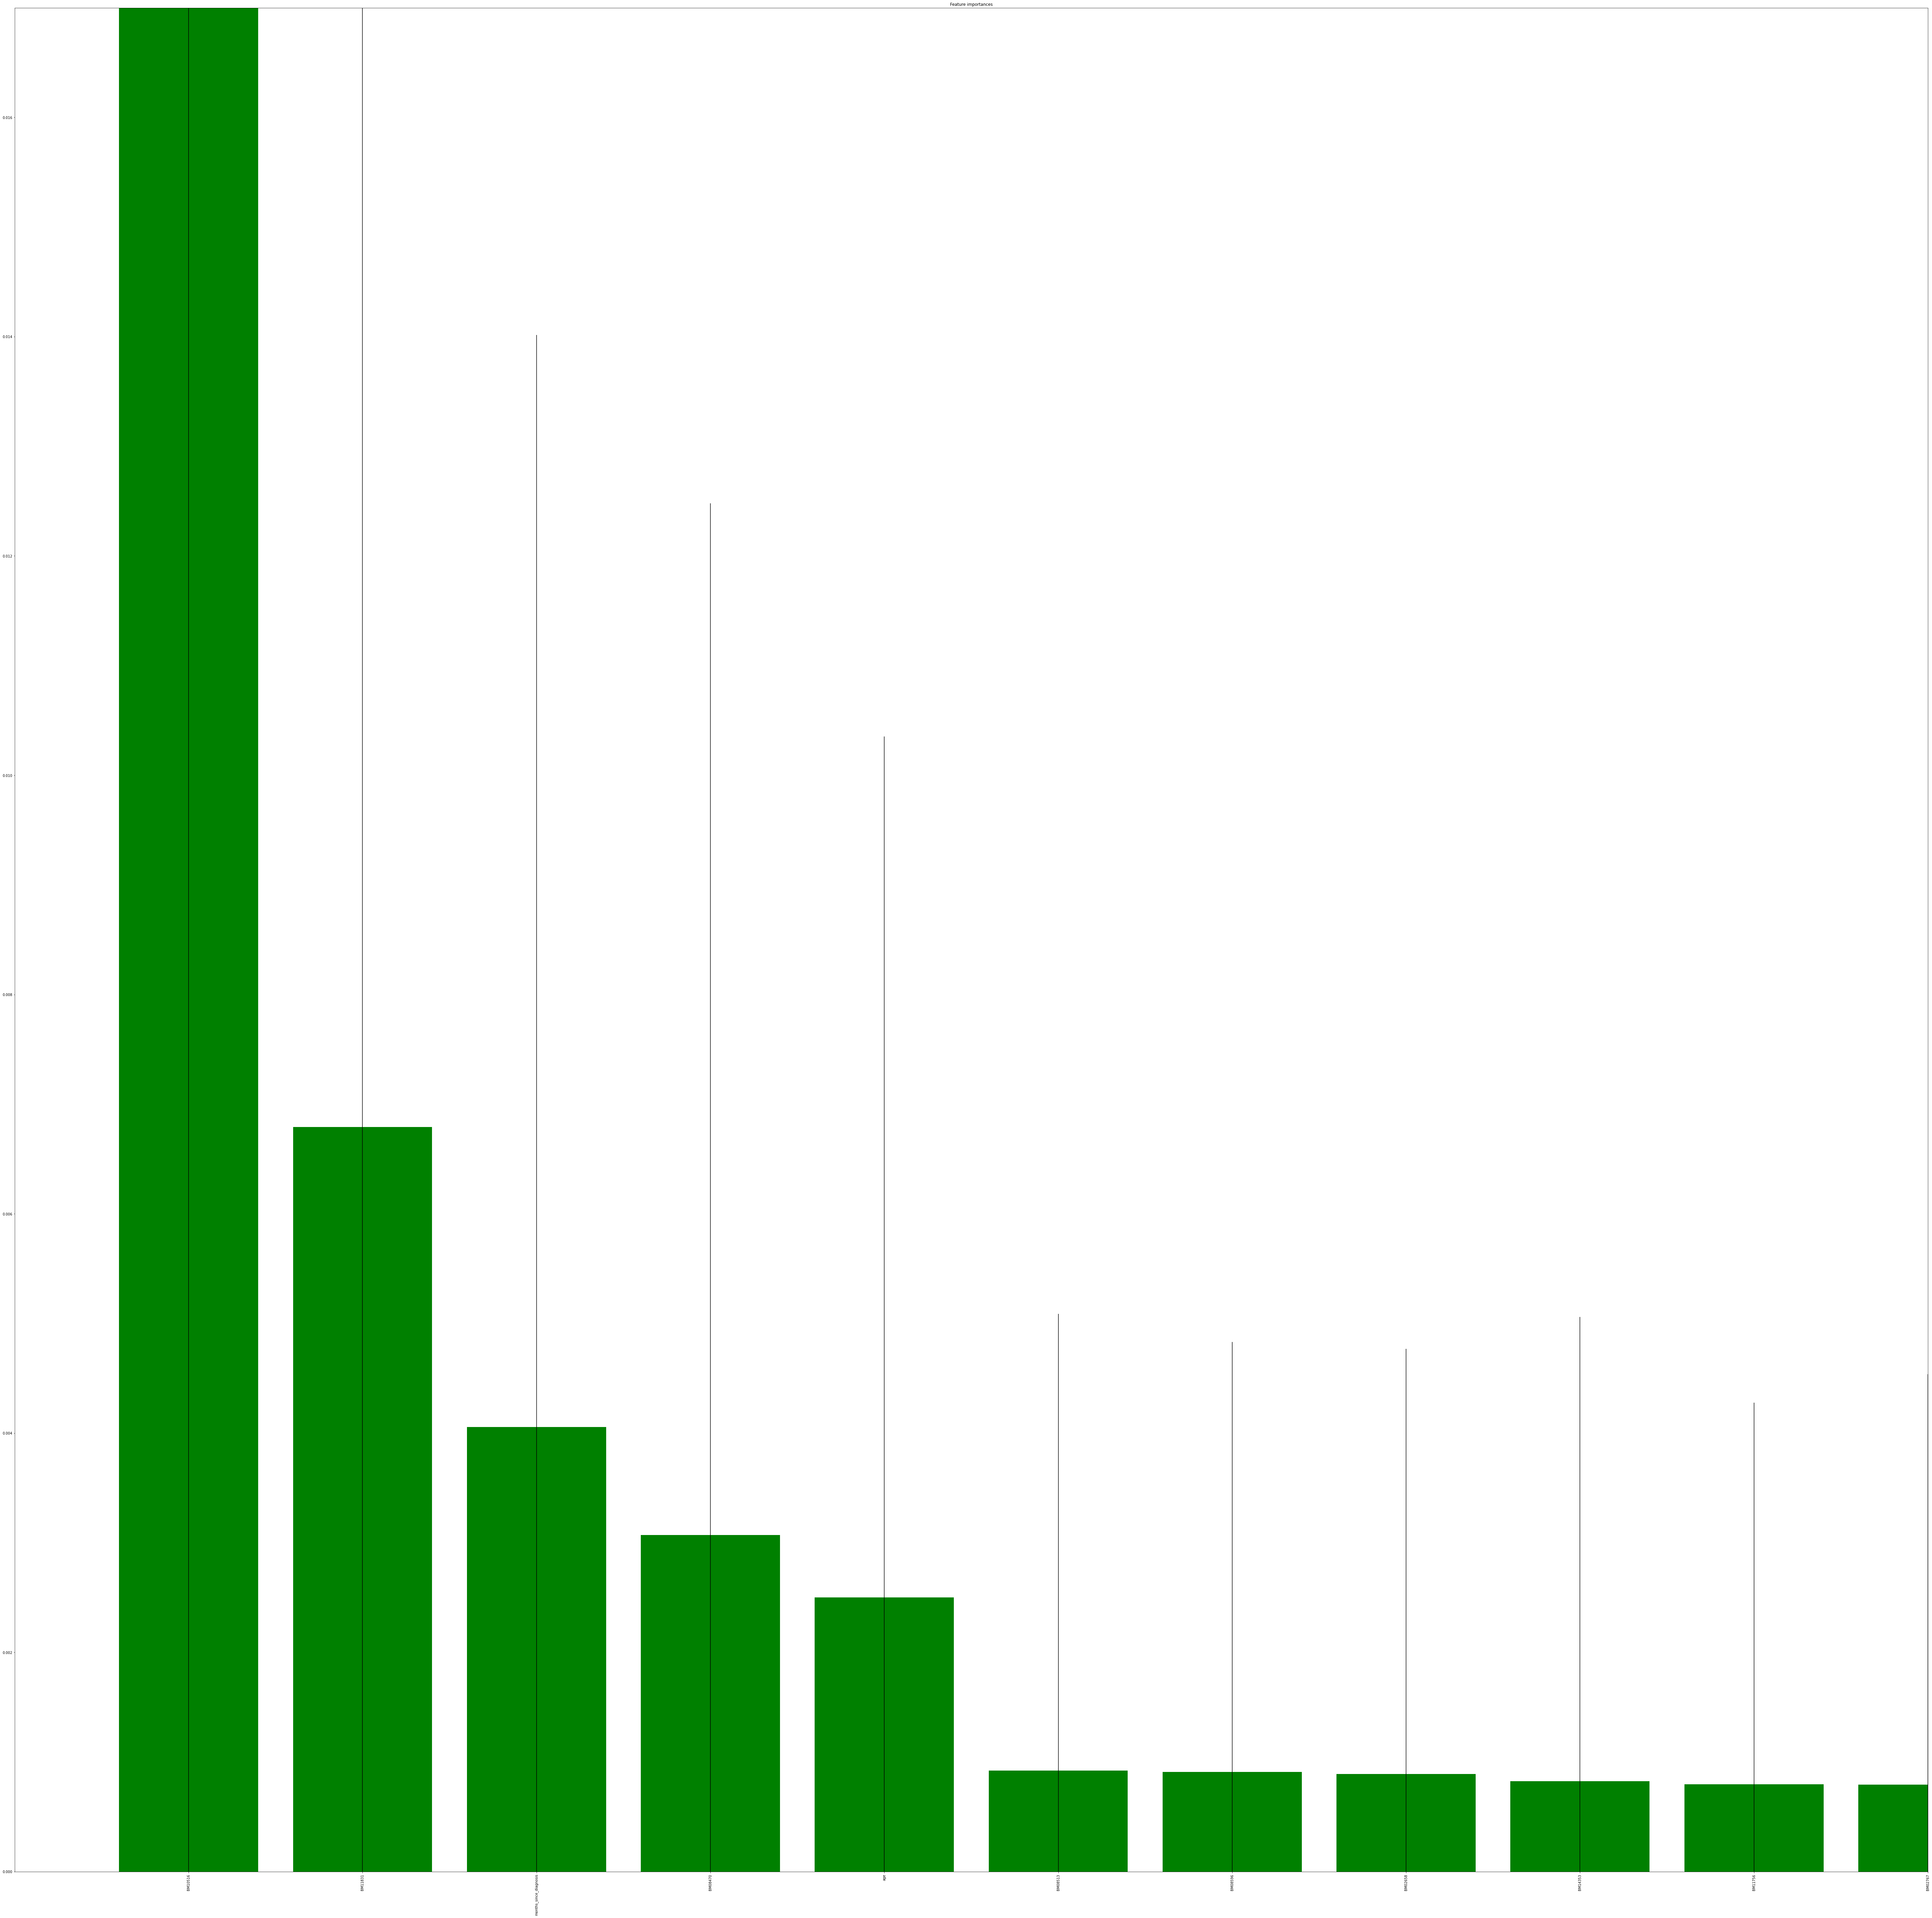

In [672]:
plt.figure(1, figsize=(100, 100))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, 10])
plt.ylim(0.0,0.017)
plt.show()

Text(0, 0.5, 'explained_variance_ratio_')

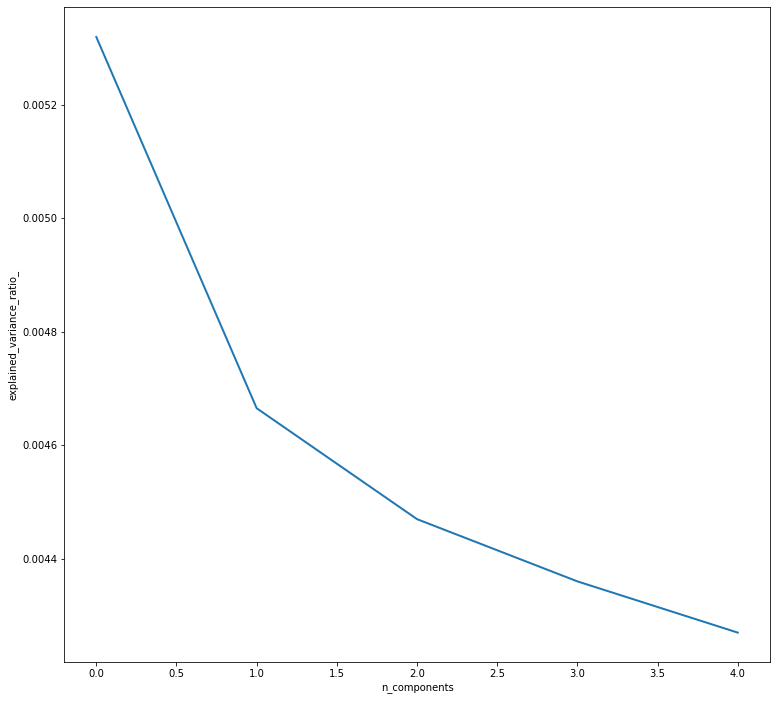

In [667]:
# Using PCA the check the main components  as it seems lots of the features has limited predcitive power

#FOR PCA I need to standardize the data
# Standardising the values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x_train)

# Call the PCA method with 5 components. 
pca = PCA(n_components=5)
pca.fit(X_std)
X_5d = pca.transform(X_std)


plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Insight: According to PCA only 4 components can explain the data 

In [101]:
from sklearn.feature_selection import SelectFromModel
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)


clf.fit(x_train, y_train)
feat_labels = x_train.columns
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('institution_Goodfellow Research Institute', 6.911221186857474e-05)
('institution_Johnson & Bloom Hospitals', 2.81428502978395e-05)
('institution_Montague Hospital', 6.344521363231706e-05)
('institution_Saint Penelope Medical Center', 6.508575501935558e-05)
('institution_University Hospital System', 5.6628143209277574e-05)
('gender_male', 0.000813331115389277)
('race_asian', 7.355454953160239e-05)
('race_black or african american', 7.012394301280603e-05)
('race_native hawaiian or other pacific islander', 1.3715422851406073e-05)
('race_white', 7.401756821868965e-05)
('disease_sub_type_B', 4.764087610927391e-05)
('disease_sub_type_C', 6.716146911602741e-05)
('disease_sub_type_D', 3.1867675076165485e-05)
('disease_sub_type_E', 3.704197113597356e-05)
('disease_sub_type_F', 3.045933634908619e-05)
('smoking_status_former', 6.733639938097394e-05)
('smoking_status_never', 0.00025275468682645373)
('smoking_status_unknown', 3.848461022031764e-05)
('age', 0.0015240208516804695)
('months_since_di

In [128]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.000438)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.000438)

In [129]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

gender_male
age
months_since_diagnosis
BM05166
BM05719
BM08470
BM10171
BM10516
BM10582
BM11831
BM12553
BM12577
BM13553
BM14353
BM15098


In [130]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

Location and Varibablity
Outlier Investigation

Let's investagate each fearure distribution for each outcome(target label)


Exploring Locationa and variability:

A fundamental task in many statistical analyses is to characterize the location and variability of a data set.

A further characterization of the data includes skewness and kurtosis.

Skewness is a measure of symmetry.


Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

That is, data sets with high kurtosis tend to have heavy tails, or outliers. 

Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case


In [76]:
from scipy.stats import skew
from scipy.stats import kurtosis

import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')
def plotBarCat(df,feature,target):
    
    
    
    x0 = df[df[target]=='0'][feature]
    x1 = df[df[target]=='1'][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        
#         df[target] =pd.to_numeric(df[target], errors='coerce')
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(pd.to_numeric(df[target])))
        print("{0} var  : ".format(target), np.var(pd.to_numeric(df[target])))
        print("{0} skew : ".format(target), skew(pd.to_numeric(df[target])))
        print("{0} kurt : ".format(target), kurtosis(pd.to_numeric(df[target])))
        print('-*-'*25)
    DescribeFloatSkewKurt(df,target)
    

In [77]:
plotBarCat(df_fill_na,'age','target_label')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
target_label mean :  0.21972318339100347
target_label var  :  0.17144490607152693
target_label skew :  1.3538011503505099
target_label kurt :  -0.16722244530963648
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [78]:
plotBarCat(df_fill_na,'months_since_diagnosis','target_label')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
target_label mean :  0.21972318339100347
target_label var  :  0.17144490607152693
target_label skew :  1.3538011503505099
target_label kurt :  -0.16722244530963648
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [278]:
# Selected features based on Chi ^2 77% f1,
# ['gender_male', 'age', 'months_since_diagnosis', 'BM01029', 'BM04394', 'BM05166', 'BM05719', 'BM05997', 'BM08470', 'BM10516', 'BM11831', 'BM12553', 'BM12577', 'BM14353', 'BM14764']

In [79]:
plotBarCat(df_fill_na,'gender_male','target_label')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
target_label mean :  0.21972318339100347
target_label var  :  0.17144490607152693
target_label skew :  1.3538011503505099
target_label kurt :  -0.16722244530963648
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [280]:
plotBarCat(df_fill_na,'BM01029','target_label')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
target_label mean :  0.21972318339100347
target_label var  :  0.17144490607152693
target_label skew :  1.3538011503505691
target_label kurt :  -0.1672224453095712
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [281]:
plotBarCat(df_fill_na,'BM05997','target_label')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
target_label mean :  0.21972318339100347
target_label var  :  0.17144490607152693
target_label skew :  1.3538011503505691
target_label kurt :  -0.1672224453095712
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


Outlier Investigation

In [80]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [81]:
OutLiersBox(df_fill_na,'months_since_diagnosis')

In [82]:
OutLiersBox(df_fill_na,'age')

In [ ]:
#The data suffrom outliers... I will investigate their impact later on

In [ ]:
#Fitting  Model with 10 Fold Cross Valiation and test dataset seprately

In [83]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [84]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [85]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'f1_macro'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring )
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [86]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [90]:
#selecting features based on chi^2, since the result was promising...

X_train = x_train_2

X_test = x_test_2


In [88]:
x_train_2.shape

(1900, 15)

In [91]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)



LR: 0.869865 (0.031443)
LDA: 0.859707 (0.030574)
KNN: 0.793757 (0.032447)
CART: 0.943540 (0.013848)
NB: 0.561831 (0.022263)
SVM: 0.620866 (0.034923)
AB: 0.884644 (0.030024)
GBM: 0.912600 (0.014361)
RF: 0.967336 (0.013714)
ET: 0.969979 (0.010016)


In [92]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'F_1 Score': scores})
    return scoreDataFrame

In [93]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

,Model,F_1 Score
0,LR,0.8699
1,LDA,0.8597
2,KNN,0.7938
3,CART,0.9435
4,NB,0.5618
5,SVM,0.6209
6,AB,0.8846
7,GBM,0.9126
8,RF,0.9673
9,ET,0.9700


4.1. Data Preprocessig

Numerical features preprocessing is different for tree and non tree model.

1) Usually:

    Tree based models does not depend on scaling
    Non-tree based models hugely depend on scaling

2) Most Often used preprocening are:

    MinMax scaler to [0,1]
    Standard Scaler to mean = 0 and std =1
    Rank (We do not work on it in this data set)
    Using np.log(1+data), np.sqrt(data) and stats.boxcox(data) (for exp dependency)

let's try some of them and see how our model prediction change by scalling


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [97]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.871986 (0.028084)
standardLDA: 0.859707 (0.030574)
standardKNN: 0.887664 (0.018341)
standardCART: 0.939833 (0.012389)
standardNB: 0.399662 (0.017639)
standardSVM: 0.907849 (0.023104)
standardAB: 0.885170 (0.028834)
standardGBM: 0.912600 (0.014361)
standardRF: 0.968394 (0.011788)
standardET: 0.968394 (0.010811)


,Model,F_1 Score,Model,F_1 Score
0,LR,0.8699,standardLR,0.8720
1,LDA,0.8597,standardLDA,0.8597
2,KNN,0.7938,standardKNN,0.8877
3,CART,0.9435,standardCART,0.9398
4,NB,0.5618,standardNB,0.3997
5,SVM,0.6209,standardSVM,0.9078
6,AB,0.8846,standardAB,0.8852
7,GBM,0.9126,standardGBM,0.9126
8,RF,0.9673,standardRF,0.9684
9,ET,0.9700,standardET,0.9684


Insight: standardization makes the non-tree based model better

In [98]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.870945 (0.021985)
minmaxLDA: 0.859707 (0.030574)
minmaxKNN: 0.880646 (0.025556)
minmaxCART: 0.947255 (0.013807)
minmaxNB: 0.425637 (0.025683)
minmaxSVM: 0.885724 (0.019964)
minmaxAB: 0.885170 (0.028834)
minmaxGBM: 0.912600 (0.014361)
minmaxRF: 0.968921 (0.012574)
minmaxET: 0.968923 (0.011169)


,Model,F_1 Score,Model,F_1 Score,Model,F_1 Score
0,LR,0.8699,standardLR,0.8720,minmaxLR,0.8709
1,LDA,0.8597,standardLDA,0.8597,minmaxLDA,0.8597
2,KNN,0.7938,standardKNN,0.8877,minmaxKNN,0.8806
3,CART,0.9435,standardCART,0.9398,minmaxCART,0.9473
4,NB,0.5618,standardNB,0.3997,minmaxNB,0.4256
5,SVM,0.6209,standardSVM,0.9078,minmaxSVM,0.8857
6,AB,0.8846,standardAB,0.8852,minmaxAB,0.8852
7,GBM,0.9126,standardGBM,0.9126,minmaxGBM,0.9126
8,RF,0.9673,standardRF,0.9684,minmaxRF,0.9689
9,ET,0.9700,standardET,0.9684,minmaxET,0.9689


#outlier Detection

Remove Outlier
I am exploring if elimnating outliers will impact the final models

In [101]:
chi2_list = ['gender_male', 'age', 'months_since_diagnosis', 'BM01029', 'BM04394', 'BM05166', 'BM05719', 'BM05997', 'BM08470', 'BM10516', 'BM11831', 'BM12553', 'BM12577', 'BM14353', 'BM14764']




In [497]:
y_train.shape

(1900,)

In [102]:
x_train_15 = x_train[chi2_list]
x_train_15.shape
df_train_15 = pd.concat([x_train_15,y_train],axis = 1)

In [103]:
df_train_15_t = df_train_15.copy()
df_train_15_t_name = df_train_15_t.columns

In [104]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [105]:
df_name = df_train_15.columns

In [106]:
feature_number = 2
OutLiersBox(df_train_15,df_name[feature_number])

In [108]:
df_clean = TurkyOutliers(df_train_15_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])


Number of outliers (inc duplicates): 108 and outliers: [35. 33. 31. 52. 28. 43. 31. 34. 34. 41. 29. 34. 53. 52. 35. 31. 41. 32.
 40. 29. 41. 34. 33. 36. 46. 29. 35. 28. 52. 29. 33. 31. 49. 33. 33. 38.
 41. 34. 34. 29. 35. 85. 42. 33. 42. 79. 42. 41. 54. 43. 33. 39. 41. 79.
 36. 42. 42. 31. 57. 31. 42. 39. 43. 31. 36. 33. 53. 43. 42. 53. 31. 53.
 33. 42. 93. 33. 43. 53. 54. 42. 42. 57. 42. 79. 31. 31. 93. 79. 31. 57.
 39. 42. 57. 43. 33. 33. 33. 31. 31. 41. 41. 42. 43. 42. 30. 31. 41. 31.]
New dataset with removed outliers has 1732 samples with 16 features each.


In [109]:
feature_number = 1
OutLiersBox(df_train_15,df_name[feature_number])

In [110]:
df_clean = TurkyOutliers(df_train_15_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 22 and outliers: [36. 28. 35. 33. 31. 26. 34. 31. 34. 29. 35. 34. 29. 31. 34. 29. 29. 29.
 29. 34. 34. 34.]
New dataset with removed outliers has 1855 samples with 16 features each.


In [112]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df_train_15_t.shape[0],df_clean.shape[0],
                                                              df_train_15_t.shape[0]-df_clean.shape[0],
                                                        (df_train_15_t.shape[0]-df_clean.shape[0])/df_train_15_t.shape[0]*100))



df shape: 1900, new df shape: 1855, we lost 45 rows, 2.368421052631579% of our data


In [113]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:15]]
Y_c = df_clean[df_clean_name[15]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_clean['target_label'])

In [114]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmaxLR: 0.863523 (0.023149)
minmaxLDA: 0.860053 (0.026512)
minmaxKNN: 0.851039 (0.032567)
minmaxCART: 0.926694 (0.016390)
minmaxNB: 0.421100 (0.021646)
minmaxSVM: 0.876559 (0.023745)
minmaxAB: 0.879740 (0.027401)
minmaxGBM: 0.917555 (0.022271)
minmaxRF: 0.948325 (0.017384)
minmaxET: 0.953725 (0.017014)


,Model,F_1 Score,Model,F_1 Score,Model,F_1 Score,Model,F_1 Score
0,LR,0.8699,standardLR,0.8720,minmaxLR,0.8709,minmaxLR,0.8635
1,LDA,0.8597,standardLDA,0.8597,minmaxLDA,0.8597,minmaxLDA,0.8601
2,KNN,0.7938,standardKNN,0.8877,minmaxKNN,0.8806,minmaxKNN,0.8510
3,CART,0.9435,standardCART,0.9398,minmaxCART,0.9473,minmaxCART,0.9267
4,NB,0.5618,standardNB,0.3997,minmaxNB,0.4256,minmaxNB,0.4211
5,SVM,0.6209,standardSVM,0.9078,minmaxSVM,0.8857,minmaxSVM,0.8766
6,AB,0.8846,standardAB,0.8852,minmaxAB,0.8852,minmaxAB,0.8797
7,GBM,0.9126,standardGBM,0.9126,minmaxGBM,0.9126,minmaxGBM,0.9176
8,RF,0.9673,standardRF,0.9684,minmaxRF,0.9689,minmaxRF,0.9483
9,ET,0.9700,standardET,0.9684,minmaxET,0.9689,minmaxET,0.9537


In [ ]:
#insights: Removing outliers did not have lots of impcat on the final models

In [534]:
X_train.shape

(1900, 15)

In [115]:
clf = ExtraTreesClassifier(n_estimators=10,
                              random_state=SEED)
# X_train_c = X_train
# y_train_c = y_train


# X_train = x_train_2

# X_test = x_test_2
clf.fit(X_train, y_train)




ExtraTreesClassifier(n_estimators=10, random_state=7)

In [117]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [118]:
x_train_15.columns[sorted_idx]

Index(['BM04394', 'BM01029', 'BM12577', 'BM05997', 'BM14764', 'BM05166',
       'BM12553', 'BM08470', 'BM05719', 'BM14353', 'gender_male', 'age',
       'months_since_diagnosis', 'BM11831', 'BM10516'],
      dtype='object')

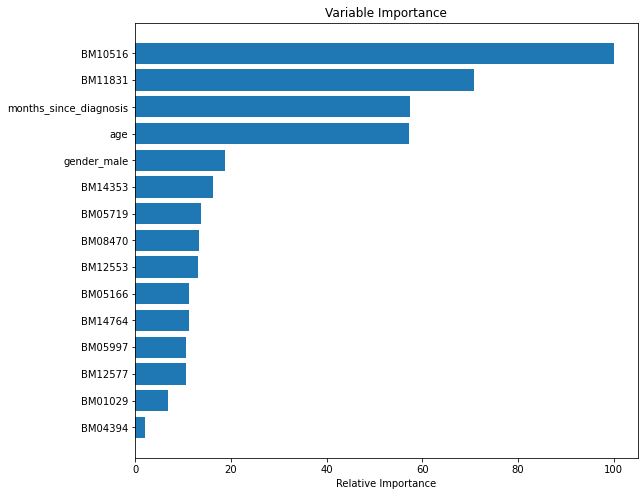

In [119]:
# plt.subplot(1, 2, 2)
plt.figure(1, figsize=(9, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train_15.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

# plt.xlim([0, 1])
# plt.ylim(0.0,0.017)
plt.show()

In [126]:
X_TEST

,institution_Goodfellow Research Institute,institution_Johnson & Bloom Hospitals,institution_Montague Hospital,institution_Saint Penelope Medical Center,institution_University Hospital System,gender_male,race_asian,race_black or african american,race_native hawaiian or other pacific islander,race_white,...,BM15145,BM15146,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15155,BM15156
522,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,1,1,0,1,1
135,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,1
727,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
1405,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
1472,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,1
1280,1,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,1
287,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,1
707,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,1


In [128]:
x_train_15.shape
x_train_15_imp = x_train_15.loc[:,x_train_15.columns[sorted_idx][-14:]]
x_train_15_imp.shape

(1900, 14)

In [137]:
y_train

720     0
614     0
845     0
327     0
808     0
       ..
1709    1
959     1
812     1
1189    1
1682    1
Name: target_label, Length: 1900, dtype: object

In [138]:
df_imp = pd.concat([x_train_15_imp,y_train],axis = 1)

In [139]:
df_imp

,BM01029,BM12577,BM05997,BM14764,BM05166,BM12553,BM08470,BM05719,BM14353,gender_male,age,months_since_diagnosis,BM11831,BM10516,target_label
720,0,0,0,0,0,1,0,1,0,1,76.0,26.0,1,0,0
614,0,0,0,0,0,1,0,0,1,1,52.0,12.0,1,0,0
845,0,0,0,1,0,1,0,1,0,1,53.0,4.0,0,0,0
327,0,0,0,0,0,1,1,1,1,1,62.0,1.0,0,0,0
808,0,0,0,1,0,0,1,0,0,0,44.0,10.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,0,0,0,0,0,0,0,0,1,1,38.0,0.0,0,1,1
959,0,0,0,1,0,1,0,0,0,0,69.0,0.0,0,0,1
812,0,0,0,0,0,0,0,0,0,0,72.0,3.0,0,1,1
1189,0,0,0,0,0,0,0,0,0,1,62.0,0.0,0,1,1


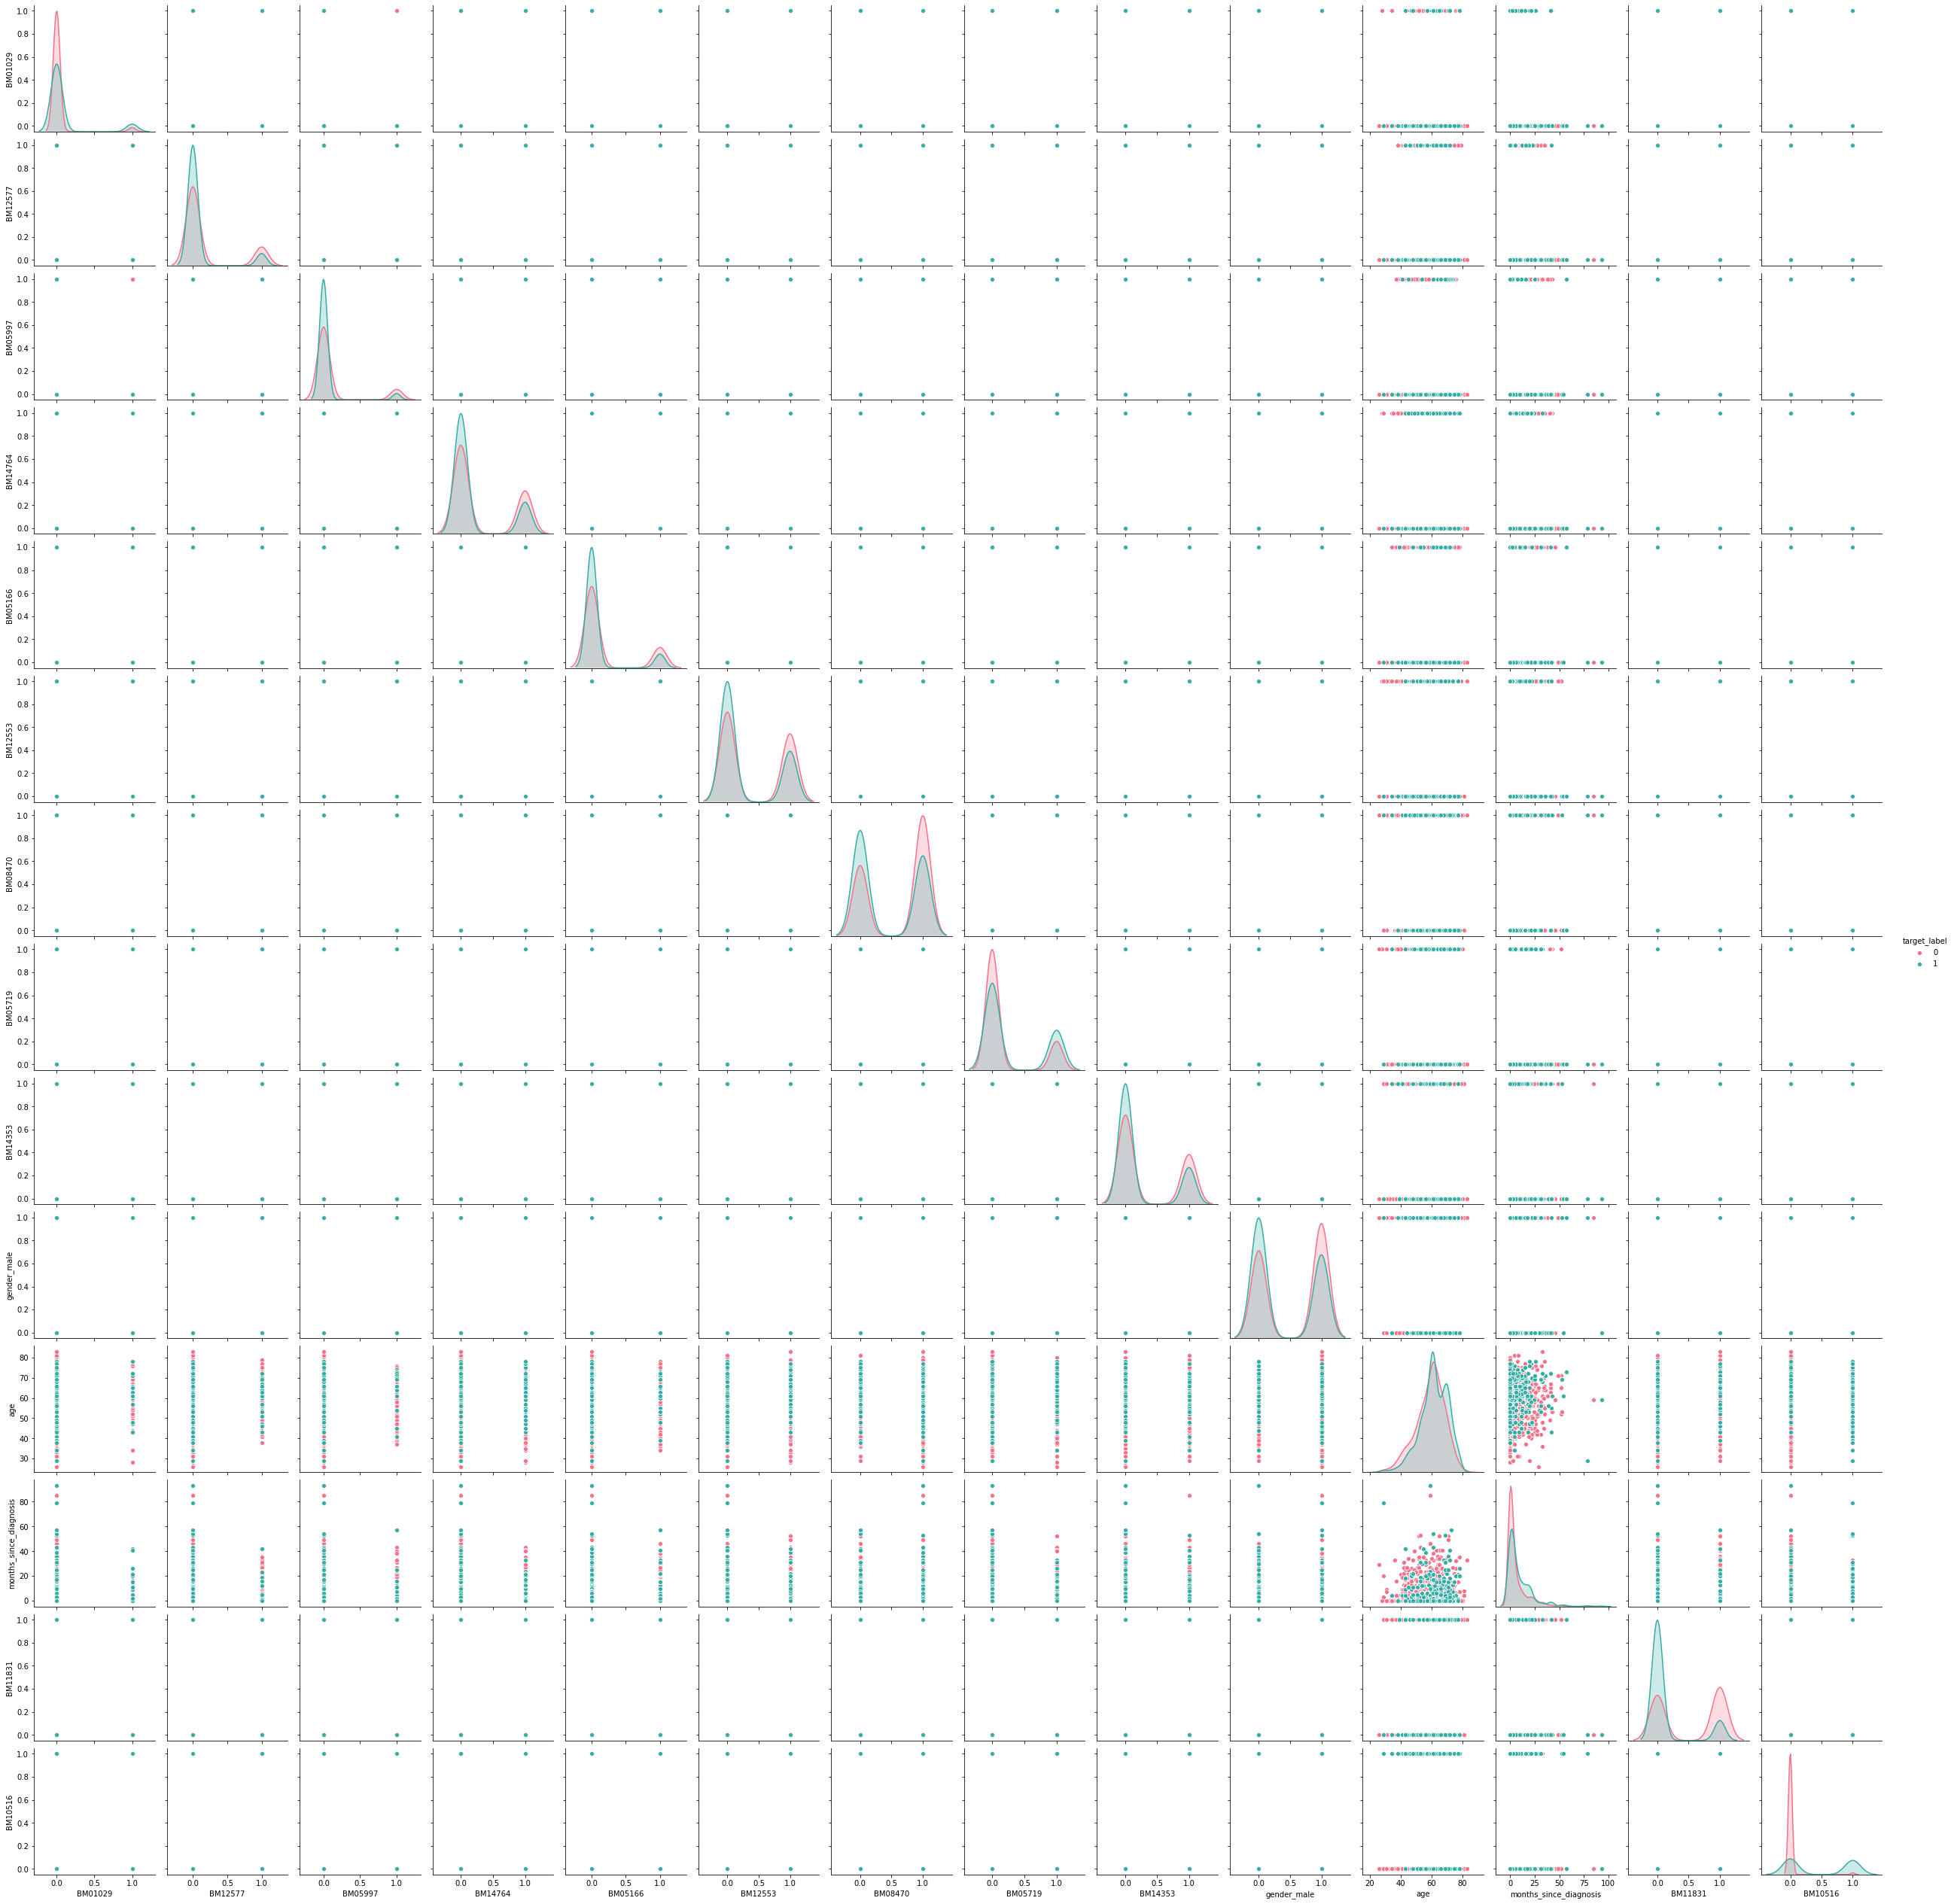

In [213]:
g = sns.pairplot(df_imp, hue="target_label", palette="husl")
#Insight We have outlier in the data

In [381]:
# df_fill_na_50 = df_fill_na.loc[:,df_fill_na.columns[sorted_idx][-50:]]
# df_fill_na_50_1 = pd.concat([df_fill_na_50,data['target_label']],axis = 1)
# df_feature_imp = df_fill_na_50_1
# df_feature_imp.shape
# df_imp

(1734, 51)

In [140]:
df_feature_imp = df_imp
df_feature_imp.shape

(1900, 15)

In [141]:
# df_feature_imp_name = df_feature_imp.columns

In [144]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_feature_imp['target_label'])

In [145]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.859978 (0.025228)
minmaxLDA: 0.849677 (0.024689)
minmaxKNN: 0.849290 (0.029100)
minmaxCART: 0.929078 (0.022293)
minmaxNB: 0.794760 (0.020103)
minmaxSVM: 0.848699 (0.037378)
minmaxAB: 0.888608 (0.012555)
minmaxGBM: 0.904452 (0.021322)
minmaxRF: 0.962373 (0.013887)
minmaxET: 0.955614 (0.014068)


,Model,F_1 Score,Model,F_1 Score,Model,F_1 Score,Model,F_1 Score,Model,F_1 Score
0,LR,0.8699,standardLR,0.8720,minmaxLR,0.8709,minmaxLR,0.8635,minmaxLR,0.8600
1,LDA,0.8597,standardLDA,0.8597,minmaxLDA,0.8597,minmaxLDA,0.8601,minmaxLDA,0.8497
2,KNN,0.7938,standardKNN,0.8877,minmaxKNN,0.8806,minmaxKNN,0.8510,minmaxKNN,0.8493
3,CART,0.9435,standardCART,0.9398,minmaxCART,0.9473,minmaxCART,0.9267,minmaxCART,0.9291
4,NB,0.5618,standardNB,0.3997,minmaxNB,0.4256,minmaxNB,0.4211,minmaxNB,0.7948
5,SVM,0.6209,standardSVM,0.9078,minmaxSVM,0.8857,minmaxSVM,0.8766,minmaxSVM,0.8487
6,AB,0.8846,standardAB,0.8852,minmaxAB,0.8852,minmaxAB,0.8797,minmaxAB,0.8886
7,GBM,0.9126,standardGBM,0.9126,minmaxGBM,0.9126,minmaxGBM,0.9176,minmaxGBM,0.9045
8,RF,0.9673,standardRF,0.9684,minmaxRF,0.9689,minmaxRF,0.9483,minmaxRF,0.9624
9,ET,0.9700,standardET,0.9684,minmaxET,0.9689,minmaxET,0.9537,minmaxET,0.9556


Algorithm Tuning

In [146]:
# df_fill_na_50 = df_fill_na.loc[:,df_fill_na.columns[sorted_idx][-50:]]
# df_fill_na_50_1 = pd.concat([df_fill_na_50,data['target_label']],axis = 1)
# df_unscaled = df_fill_na_50_1
df_unscaled = df_feature_imp
df_imp_scaled_name = df_unscaled.columns

In [152]:
df_unscaled

,BM01029,BM12577,BM05997,BM14764,BM05166,BM12553,BM08470,BM05719,BM14353,gender_male,age,months_since_diagnosis,BM11831,BM10516,target_label
720,0,0,0,0,0,1,0,1,0,1,76.0,26.0,1,0,0
614,0,0,0,0,0,1,0,0,1,1,52.0,12.0,1,0,0
845,0,0,0,1,0,1,0,1,0,1,53.0,4.0,0,0,0
327,0,0,0,0,0,1,1,1,1,1,62.0,1.0,0,0,0
808,0,0,0,1,0,0,1,0,0,0,44.0,10.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1709,0,0,0,0,0,0,0,0,1,1,38.0,0.0,0,1,1
959,0,0,0,1,0,1,0,0,0,0,69.0,0.0,0,0,1
812,0,0,0,0,0,0,0,0,0,0,72.0,3.0,0,1,1
1189,0,0,0,0,0,0,0,0,0,1,62.0,0.0,0,1,1


In [153]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:14]
Y =  df_imp_scaled[:,14]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,14])

In [165]:
# X_train_sc 
X_train_sc = X_train 
X_test_sc = x_test_2
y_train_sc = y_train 
y_test_sc= Y_TEST

In [166]:
X_test_sc.shape

(521, 15)

In [167]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [168]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [169]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    

Logistic Regression

    C : Regularization value, the more, the stronger the regularization(double).
    RegularizationType: Can be either "L2" or “L1”. Default is “L2”.


In [170]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [171]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.873158 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [173]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [174]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.8042226


In [175]:
f1_scr= f1_score(y_test_sc,Prediction_LR,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

f1_score is:  0.6382978723404256


KNN
n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [177]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [178]:
KNN_GridSearch = GridSearch(X_train_sc,y_train_sc,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_KNN).mean(),7))

Best: 0.902105 using {'n_neighbors': 1}
prediction on test set is: 0.7485605


In [179]:
f1_scr= f1_score(y_test_sc,Prediction_KNN,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

f1_score  on test set is:  0.4072398190045249


C: The Penalty parameter C of the error term.
Kernel: Kernel type could be linear, poly, rbf or sigmoid

In [180]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [181]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.871053 using {'C': 0.7, 'kernel': 'linear'}
prediction on test set is: 0.8080614


In [184]:
f1_scr= f1_score(y_test_sc,Prediction_SVC,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

f1_score  on test set is:  0.645390070921986


Decision Tree

    max_depth: Maximum depth of the tree (double).
    row_subsample: Proportion of observations to consider (double).
    max_features: Proportion of columns (features) to consider in each level (double).


In [185]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 49)
min_samples_leaf_value = randint(1, 49)
criterion_value = ["gini", "entropy"]

In [186]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)


In [187]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.912632 using {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
prediction on test set is: 0.8368522


In [188]:
f1_scr= f1_score(y_test_sc,Prediction_CART,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

f1_score  on test set is:  0.6840148698884758


AdaBoostClassifier
    learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
    n_estimators: Number of trees to build.


In [189]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [190]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))

Best: 0.891053 using {'learning_rate': 0.1, 'n_estimators': 200}
prediction on test set is: 0.8349328


In [191]:
f1_scr= f1_score(y_test_sc,Prediction_Ad,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

f1_score  on test set is:  0.6884057971014492


In [192]:
# GradientBoosting

learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [193]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.951579 using {'learning_rate': 0.5, 'n_estimators': 250}
prediction on test set is: 0.8445298


In [194]:
f1_scr= f1_score(y_test_sc,Prediction_Ad,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

f1_score  on test set is:  0.6884057971014492


#Ensemble Methods

Voting Ensemble
Voting is one of the simplest ways of combining the predictions from 
multiple machine learning algorithms. It works by first creating two 
or more standalone models from your training dataset. A Voting Classifier can 
then be used to wrap your models and average the
predictions of the sub-models when asked to make predictions for new data.

In [198]:
from sklearn.ensemble import VotingClassifier


param = {'C': 3.730229437354635, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 1}
model2 = KNeighborsClassifier(**param)

param = {'C': 0.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.1, 'n_estimators': 200}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.5, 'n_estimators': 250}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [199]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]
    

In [200]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())
f1_scr= f1_score(y_test_sc,pred,pos_label='1')
print('f1_score  on test set is: ',f1_scr)

Accuracy on train:  0.9536842105263158
Accuracy on test: 0.8790786948176583
f1_score  on test set is:  0.7469879518072289


In [204]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 3.730229437354635, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 1}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 0.7, 'kernel': 'linear'}
    model3 = SVC(**param,probability=True)

    param = {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.1, 'n_estimators': 200}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.5, 'n_estimators': 250}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    
    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }
    return models

In [205]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [206]:


models = get_models()
P = train_predict(models,X_train_sc,X_test_sc,y_train_sc,y_test_sc)



Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



[MLENS] backend: threading


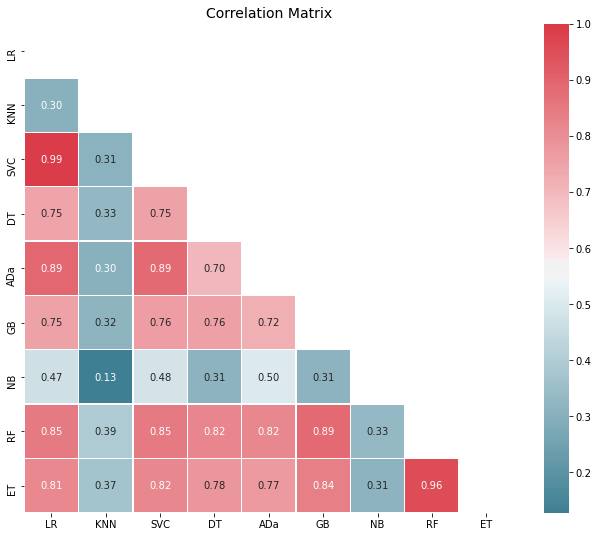

In [207]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)



Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

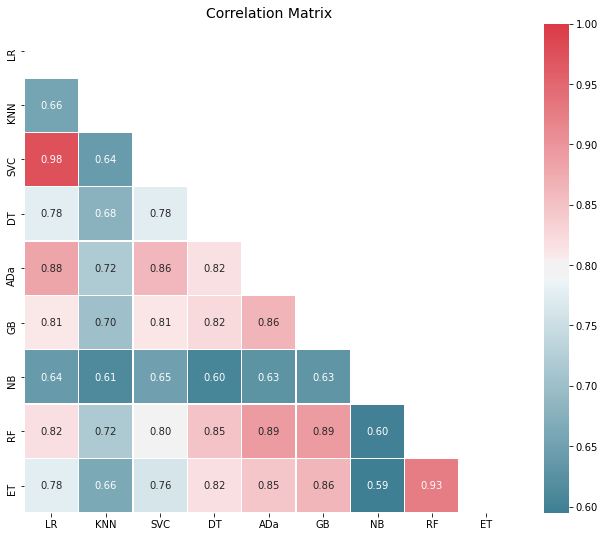

In [209]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - pd.to_numeric(y_test_sc)).corr(), inflate=False)
# pd.to_numeric(y_test_sc)

Stacking

In [210]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=250,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.5, 
    random_state=SEED
)

In [212]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=3,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train_sc, y_train_sc)

# Predict the test set
p_sl = sl.predict_proba(X_test_sc)

In [ ]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [ ]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())

Checking over fitting with Learning Curve

No handles with labels found to put in legend.


your plot has been saved!!!


<Figure size 432x288 with 0 Axes>

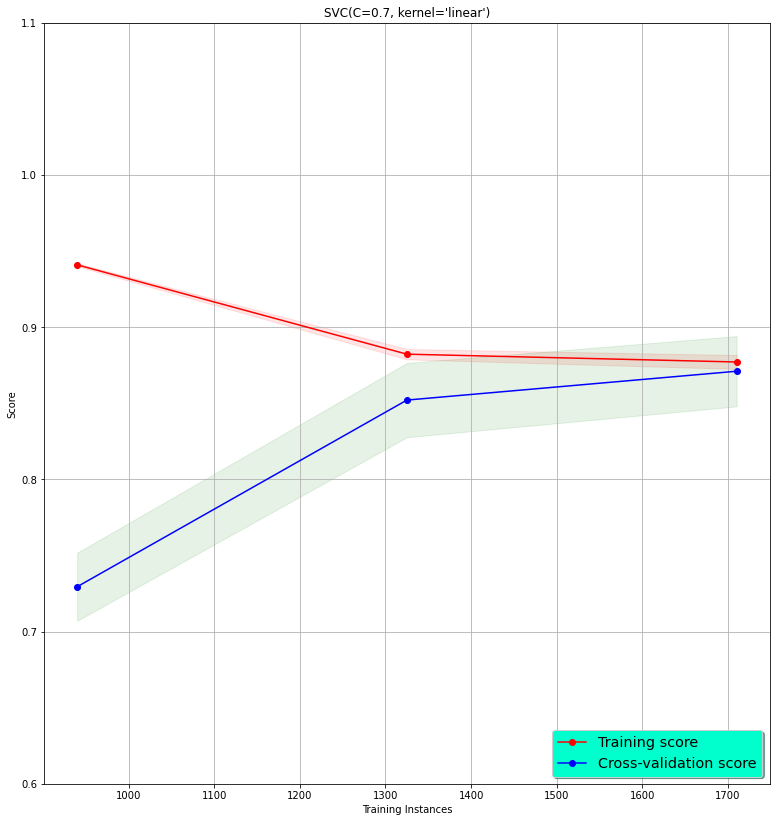

In [235]:
from sklearn.model_selection import learning_curve
def draw_learning_cuve(fitted_model,train_vec,train_data_Annotation):
    
    train_sizes, train_scores, test_scores = learning_curve(fitted_model, train_vec, train_data_Annotation, n_jobs=-1, cv=10, verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.figure(figsize=(13, 14))
    plt.title(str(fitted_model))
    plt.legend(loc="best")
    plt.xlabel("Training Instances")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()

    # box-like grid
    plt.grid()

    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")

    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(.6,1.1)
#     plt.xlim(400,1700)
    legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#00FFCC')


    #plt.show()
    fig.savefig('learn.png')
    print ("your plot has been saved!!!")

fitted_model = model3
train_data_Annotation = train_data.target_label
train_data_Annotation = y_train
draw_learning_cuve(fitted_model,X_train,train_data_Annotation)



SVM model will probably not benefit from more data.

No handles with labels found to put in legend.


your plot has been saved!!!


<Figure size 432x288 with 0 Axes>

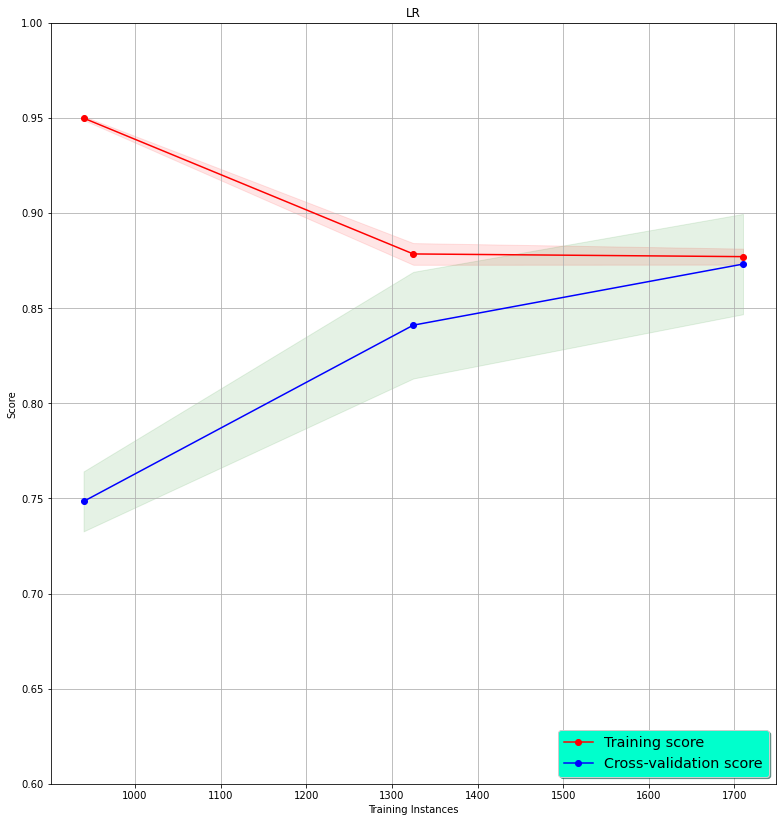

In [231]:
fitted_model = model1
train_data_Annotation = train_data.target_label
train_data_Annotation = y_train
draw_learning_cuve(fitted_model,X_train,train_data_Annotation)

LR and SVM :
The training and cross-validation scores converge together as more data is added (shown in the left figure), then the model will probably not benefit from more data.

No handles with labels found to put in legend.


your plot has been saved!!!


<Figure size 432x288 with 0 Axes>

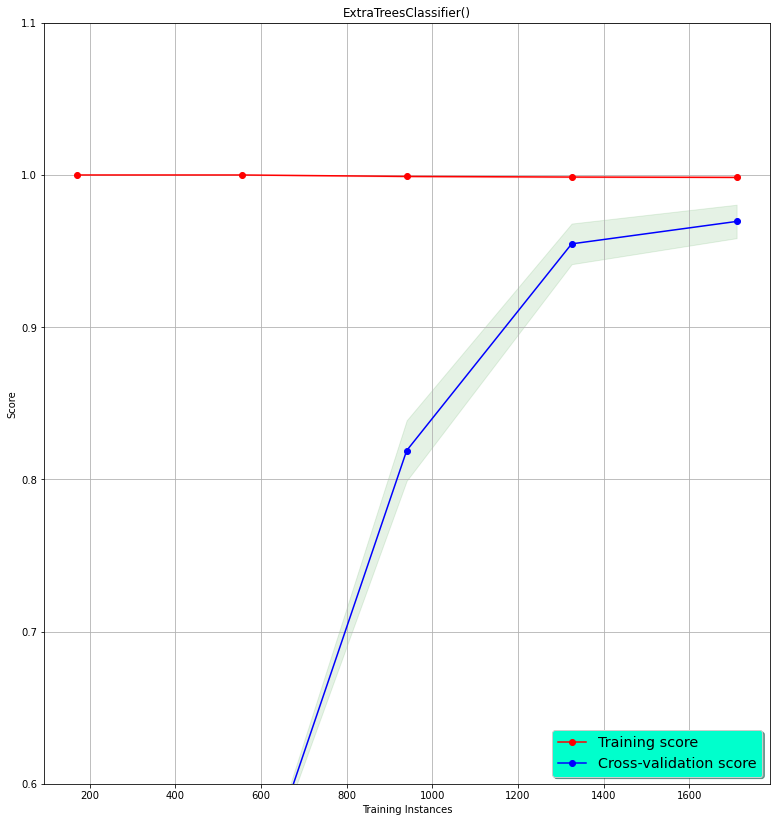

In [236]:
fitted_model = model9
train_data_Annotation = train_data.target_label
train_data_Annotation = y_train
draw_learning_cuve(fitted_model,X_train,train_data_Annotation)

Extra tree and RF:

This learning curve shows a very high variability and much lower score until about 1300 instances. It is clear that this model could benefit from more data because it is converging at a very high score. Potentially, with more data and a larger alpha for regularization, this model would become far less variable in the test data.

No handles with labels found to put in legend.


your plot has been saved!!!


<Figure size 432x288 with 0 Axes>

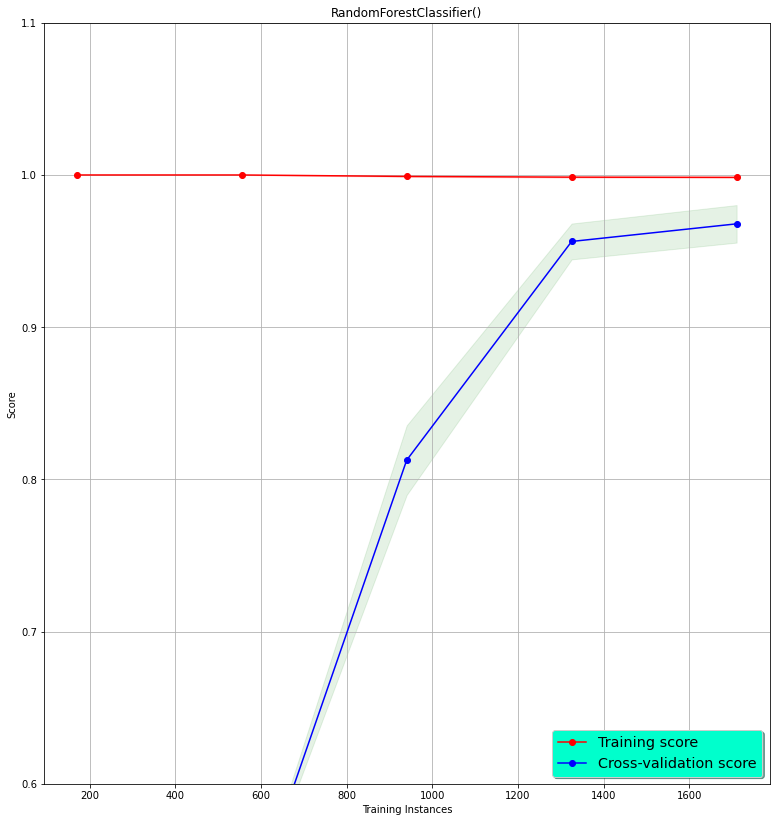

In [237]:
fitted_model = model8
train_data_Annotation = train_data.target_label
train_data_Annotation = y_train
draw_learning_cuve(fitted_model,X_train,train_data_Annotation)

Extra tree and RF:

This learning curve shows a very high variability and much lower score until about 1300 instances. It is clear that this model could benefit from more data because it is converging at a very high score. Potentially, with more data and a larger alpha for regularization, this model would become far less variable in the test data.

No handles with labels found to put in legend.


your plot has been saved!!!


<Figure size 432x288 with 0 Axes>

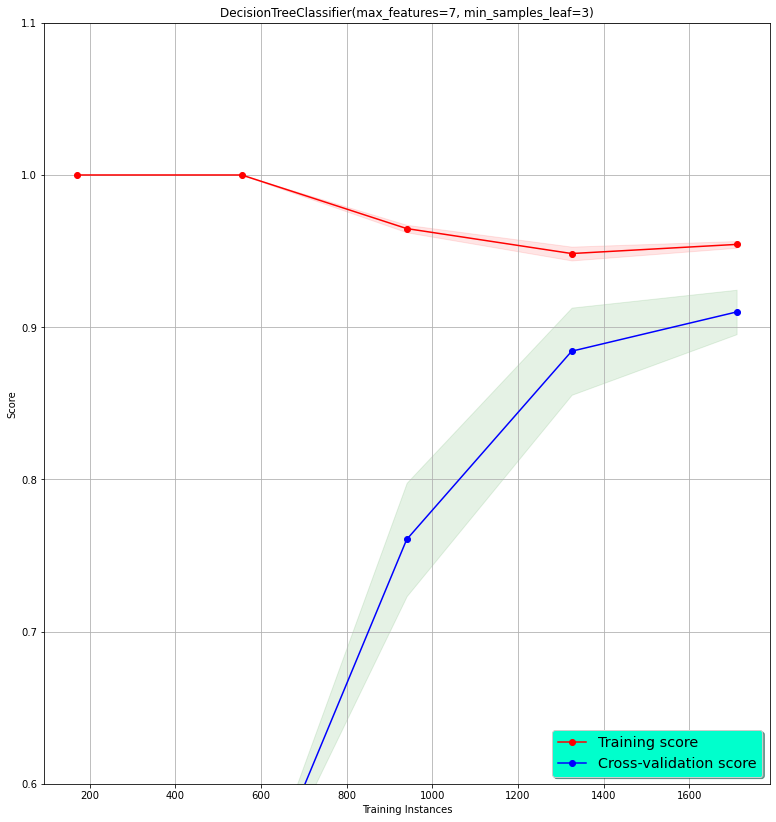

In [238]:
fitted_model = model4
train_data_Annotation = train_data.target_label
train_data_Annotation = y_train
draw_learning_cuve(fitted_model,X_train,train_data_Annotation)

Decision Tree

This learning curve shows high test variability and a low score up to around 1400 instances, however after this level the model begins to converge on an F1 score 6. We can see that the training and test scores have not yet converged, so potentially this model would benefit from more training data. Finally, this model suffers primarily from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is overfitting.

In [ ]:
model1 = LogisticRegression(**param)
model2 = KNeighborsClassifier(**param)
model3 = SVC(**param,probability=True)
model4 = DecisionTreeClassifier(**param)
model5 = AdaBoostClassifier(**param)
model6 = GradientBoostingClassifier(**param)
model7 = GaussianNB()
model8 = RandomForestClassifier()
model9 = ExtraTreesClassifier()